
### Description

Identify the level of income qualification needed for the families in Latin America

### Problem Statement Scenario:
Many social programs have a hard time making sure the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to classify them and predict their level of need. While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB) believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

### Following actions should be performed:
* Identify the output variable.
* Understand the type of data.
* Check if there are any biases in your dataset.
* Check whether all members of the house have the same poverty level.
* Check if there is a house without a family head.
* Set the poverty level of the members and the head of the house same in a family.
* Count how many null values are existing in columns.
* Remove null value rows of the target variable.
* Predict the accuracy using random forest classifier.
* Check the accuracy using a random forest with cross-validation.

In [2]:
#Import the necessary base libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.set_option("display.max_columns", None)

In [3]:
# Load datasets

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.shape

(9557, 143)

In [5]:
train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


### Identifying target output

In [6]:
for i in train_df.columns:
    if i not in test_df.columns:
        print("The Target variable is {}".format(i))

The Target variable is Target


### Data Wrangling for train dataset

In [7]:
train_df.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1

In [8]:
# Exploring data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


**There are 9557 no of rows in the train_df with 143 columns with three types of data (float, int64 and object)**

In [9]:
# Checking data type of 'float'
train_df.select_dtypes('float').info()
# From below, we can see that there are missing values in a few columns which will be handled in later stage of EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   v2a1             2697 non-null   float64
 1   v18q1            2215 non-null   float64
 2   rez_esc          1629 non-null   float64
 3   meaneduc         9552 non-null   float64
 4   overcrowding     9557 non-null   float64
 5   SQBovercrowding  9557 non-null   float64
 6   SQBdependency    9557 non-null   float64
 7   SQBmeaned        9552 non-null   float64
dtypes: float64(8)
memory usage: 597.4 KB


In [10]:
# Checking data type of 'int64'
train_df.select_dtypes('int64').describe()
# No missing values 

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
count,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,0.61850,0.100555,0.181647,0.017056,0.082243,0.102124,0.284608,0.975306,2.821492,0.587632,0.092707,0.062363,0.082767,0.093858,0.080674,0.714555,0.285445,34.303547,74.222769,1643.774302,19.132887,53.500262,3.844826,1643.774302,3.302292
std,

In [11]:
# Checking data type of 'object'
train_df.select_dtypes('object').info()
# No missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          9557 non-null   object
 1   idhogar     9557 non-null   object
 2   dependency  9557 non-null   object
 3   edjefe      9557 non-null   object
 4   edjefa      9557 non-null   object
dtypes: object(5)
memory usage: 373.4+ KB


### Check if there are any biases in your dataset.

In [12]:
# Lets check for data imbalance as that will cause biasness in the dataset
target_data = train_df.groupby('Target')['Target'].count()
target_data

Target
1     755
2    1597
3    1209
4    5996
Name: Target, dtype: int64

**About the grouped data above:**

**Target - the target is an ordinal variable indicating groups of income levels.**
- 1 - extreme poverty
- 2 - moderate poverty
- 3 - vulnerable households
- 4 - non vulnerable households

[Text(0.5, 1.0, 'Comparison of data distribution for the "target column"')]

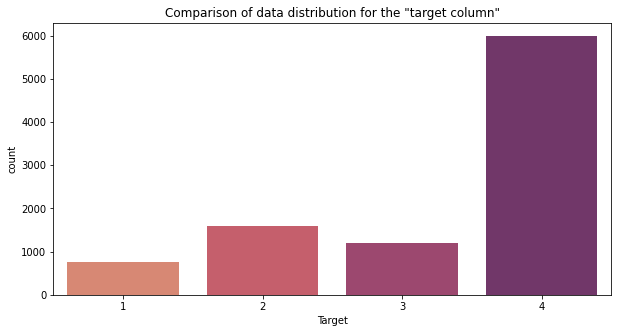

In [13]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5))
sns.countplot(x='Target', data=train_df, palette='flare').set(title='Comparison of data distribution for the "target column"')

**From the graph above, we can clearly see that dataset is imbalanced. It can influence the performance on Machine Learning algorithms. Imbalance affects ML algorithm in such a way that it ignored the minority class and in our case, we are interested in the minority class (1-extreme poverty). This can be addresed with either oversampling (duplicating data from minority class)  or undersampling (deleting data from majority class).**

##### Oversampling

In [14]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [16]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(train_df.drop('Target', axis=1),train_df['Target'])
# new class distribution 
print(Counter(y_ros))

Counter({4: 5996, 2: 5996, 3: 5996, 1: 5996})


In [17]:
X_ros.shape, y_ros.shape

((23984, 142), (23984,))

In [18]:
ros_df = X_ros.merge(y_ros, left_index=True, right_index=True)

In [19]:
train_df.shape, ros_df.shape

((9557, 143), (23984, 143))

[Text(0.5, 1.0, 'Data distribution after oversampling technique')]

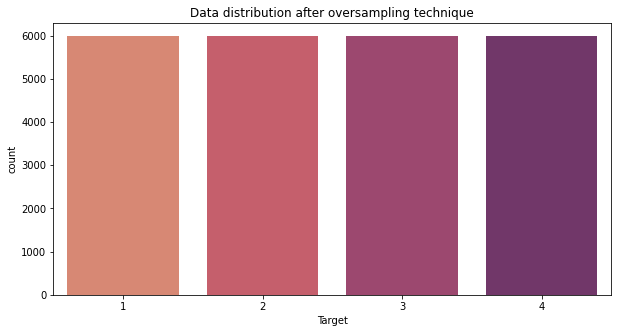

In [20]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5))
sns.countplot(x='Target', data=ros_df, palette='flare').set(title='Data distribution after oversampling technique')

### Check whether all members of the house have the same poverty level.

In [21]:
# Find unique values of "Idhogar" column
no_of_households = ros_df.groupby('idhogar')['Target'].nunique()==1
print('There are {} unique households in the dataset'.format(len(no_of_households)))

There are 2988 unique households in the dataset


In [22]:
# Find dissimilar poverty level of households
dissimilar_poverty = no_of_households[no_of_households != True]
print('There are {} households where the poverty level is not the same.'.format(len(dissimilar_poverty)))

There are 85 households where the poverty level is not the same.


In [23]:
count = 0

for x in ros_df['idhogar'].unique():
    if len(ros_df[ros_df['idhogar'] == x]['Target'].unique())==1:
        count += 1
        
print('There are {} households where the poverty level is the same.'.format(count))

There are 2903 households where the poverty level is the same.


### Check if there is a house without a family head.

In [24]:
# Group 
household_head_df = ros_df.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
house_withoutH = ros_df.loc[ros_df['idhogar'].isin(household_head_df[household_head_df == 0].index), :]
print('There are {} households without a head.'.format(house_withoutH['idhogar'].nunique()))

There are 15 households without a head.


In [25]:
# Check the target values of different household members

ros_df[ros_df['idhogar'] == dissimilar_poverty.index[3]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
8380,078a0b6e2,1,1
8381,078a0b6e2,0,2
8382,078a0b6e2,0,2
8383,078a0b6e2,0,1
10156,078a0b6e2,1,1
10255,078a0b6e2,1,1
10424,078a0b6e2,0,1
11270,078a0b6e2,1,1
11722,078a0b6e2,0,1
12373,078a0b6e2,0,1


### Set the poverty level of the members and the head of the house same in a family.

In [26]:
for x in ros_df['idhogar'].unique():
    ros_df.loc[ros_df['idhogar'] == x, 'Target'] = stats.mode(ros_df[ros_df['idhogar'] == x]['Target']).mode[0]

C:\Users\Nima\AppData\Local\Temp\ipykernel_30100\3461059224.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ros_df.loc[ros_df['idhogar'] == x, 'Target'] = stats.mode(ros_df[ros_df['idhogar'] == x]['Target']).mode[0]


In [27]:
# To check if the households' poverty level are at the same level of the head of household.
no_of_households = ros_df.groupby('idhogar')['Target'].nunique()==1
dissimilar_poverty = no_of_households[no_of_households != True]
print('There are {} households where the poverty level is not the same.'.format(len(dissimilar_poverty)))

There are 0 households where the poverty level is not the same.


### Count how many null values are existing in columns.

In [28]:
null_df = train_df.isnull().sum()/train_df.shape[0]
null_df_valid = null_df[null_df > 0]
null_df_valid

v2a1         0.717798
v18q1        0.768233
rez_esc      0.829549
meaneduc     0.000523
SQBmeaned    0.000523
dtype: float64

**Descriptions of the columns above:**
- v2a1, Monthly rent payment
- v18q1, number of tablets household owns
- rez_esc, Years behind in school
- meaneduc, average years of education for adults (18+)
- SQBmeaned, square of the mean years of education of adults (>=18) in the houshold

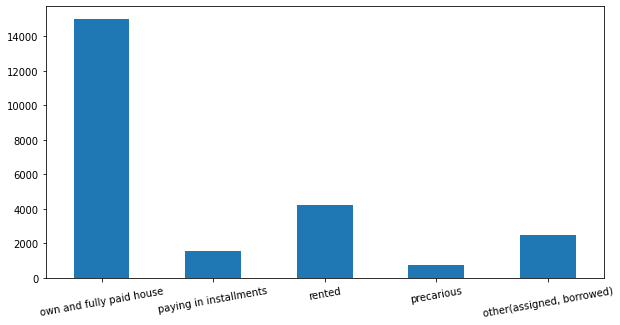

In [29]:
# Exploring column 'v2a1'

ros_df[['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']].sum().plot(kind='bar',figsize = (10, 5))
plt.xticks(rotation=10,ticks= [0,1,2,3,4], labels=['own and fully paid house', 'paying in installments', 'rented', 'precarious', 'other(assigned, borrowed)'])
plt.show()

**Observation:**

Column v2a1 shows missing values of more than 50 percent. This could be explained by a few other columns(see graph above). The house could be owned and fully paid house/paying in installments/rented/precarious/other(assigned,borrowed).

In [30]:
# We can replace the NaN values in v2a1 to 0 since the graph above justifies for its NaN values.
ros_df.loc[ros_df['v2a1'].isnull(),'v2a1'] = 0
sum(ros_df['v2a1'].isnull())

0

In [31]:
# Exploring column 'v18q1' which shows the number of tablets household owns and related column 'v18q'-owns a tablet
ros_df[ros_df['v18q1'].isnull()]['v18q'].unique()

array([0], dtype=int64)

**NaN values in v18q1 means that household owns 0 no. of tablet and this can be justified with the values in v18q column.**

In [32]:
# Replacing NaNs to 0 in v18q1
ros_df.loc[ros_df['v18q1'].isnull(),'v18q1'] = 0
ros_df['v18q1'].isnull().sum()

0

In [33]:
# Exploring column 'rez_esc'(Years behind in school)
pd.set_option('display.max_rows', 200)
ros_df[ros_df['rez_esc'].isnull()]['age'].value_counts().to_frame().reset_index().rename(columns={'index':'age','age':'count'}).sort_values(by='age')

,age,count
15,0,343
8,1,396
22,2,311
0,3,502
1,4,483
6,5,409
5,6,419
86,10,1
2,18,450
4,19,427


**From the table above, most of the NaN values ranges <7 with the exception of one @ 10 years of age and the rest >17 till 97, which means younger children less than 7 years of age will not be attending school and the same goes for adults above 17 years of age. We can fill in O for all the NaN values since that will not change the meaning of the data.**

In [34]:
ros_df.loc[ros_df['rez_esc'].isnull(),'rez_esc'] = 0
ros_df['rez_esc'].isnull().sum()

0

In [35]:
# Exploring column 'meaneduc'- average years of education for adults (18+)
ros_df['meaneduc'].isnull().sum()

5

In [36]:
mean_educ = ros_df[ros_df['meaneduc'].isna()]
columns=['edjefe','edjefa','meaneduc']
mean_educ[columns]
# the NaN values in the meaneduc column is because of the mixed data values in either edjefe or edjefa column

,edjefe,edjefa,meaneduc
1291,no,10,NaN
1840,4,no,NaN
1841,4,no,NaN
2049,12,no,NaN
2050,12,no,NaN


In [37]:
# Lets handle the object type data first.
ros_df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23984 entries, 0 to 23983
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          23984 non-null  object
 1   idhogar     23984 non-null  object
 2   dependency  23984 non-null  object
 3   edjefe      23984 non-null  object
 4   edjefa      23984 non-null  object
dtypes: object(5)
memory usage: 937.0+ KB


**We can drop Id and idhogar at later stage upon choosing features and target for machine learning.**

For now, lets concentrate on 'dependency','edjefe' and 'edjefa'

1. dependency' being Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
2. 'edjefe' being years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
3. 'edjefa' being years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [38]:
obj=['edjefe','edjefa','dependency']
ros_df[obj]

,edjefe,edjefa,dependency
0,10,no,no
1,12,no,8
2,no,11,8
3,11,no,yes
4,11,no,yes
...,...,...,...
23979,no,no,8
23980,17,no,yes
23981,no,5,yes
23982,6,no,1.5


In [39]:
# Mapping categorical values to int
ros_df['edjefe'] = (ros_df['edjefe'].replace(to_replace = ['yes','no'],value = ['1','0'])).astype('int64')
ros_df['edjefa'] = (ros_df['edjefa'].replace(to_replace = ['yes','no'],value = ['1','0'])).astype('int64')
ros_df['dependency'] = (ros_df['dependency'].replace(to_replace = ['yes','no'],value = ['1','0'])).astype('float')
ros_df[obj]

,edjefe,edjefa,dependency
0,10,0,0.0
1,12,0,8.0
2,0,11,8.0
3,11,0,1.0
4,11,0,1.0
...,...,...,...
23979,0,0,8.0
23980,17,0,1.0
23981,0,5,1.0
23982,6,0,1.5


In [40]:
ros_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23984 entries, 0 to 23983
Columns: 143 entries, Id to Target
dtypes: float64(9), int64(132), object(2)
memory usage: 26.2+ MB


In [41]:
# So, back to exploring column 'meaneduc'- average years of education for adults (18+)

ros_df['meaneduc'].fillna(value = ros_df.meaneduc.mean(), inplace=True)
ros_df['meaneduc'].isna().sum()

0

#### Feature Engineering

There are a few variables that need to be removed:

1. ID variables: Those that are used to identify an individual or household
2. Squared variables: These are just the squared values of existing variables. They are highly correlated and hence, redundant.
3. Repeated variables: There are a few variables that have the same function and hence need to be removed.
4. Zero variance: Columns that have a variance of zero indicate that they have the same values for all records.

#### ID variable:'id' and 'idhogar'

In [42]:
# We do not need the id columns for our machine learning algo, we can drop them as they use to identify an individual or household
ros_df.drop(columns=['Id', 'idhogar'], inplace=True)

In [43]:
# Before handling other variables, lets find the correlations between them.
np.round(ros_df.corr().unstack().sort_values(ascending=False).drop_duplicates(), decimals=4)

v2a1             v2a1               1.0000
r4t3             hhsize             0.9984
age              SQBage             0.9577
overcrowding     SQBovercrowding    0.9536
SQBhogar_total   hogar_total        0.9504
                                     ...  
abastaguadentro  abastaguafuera    -0.9229
public           coopele           -0.9710
female           male              -1.0000
area2            area1             -1.0000
v2a1             elimbasu5             NaN
Length: 9383, dtype: float64

#### From the result above:

**We can first remove all the squared variables: ('SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned','agesq')**

In [44]:
ros_df.drop(columns=['SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned','agesq'], inplace=True)

**Moving on to the repeated variables:('tamviv','hhsize','r4t3','tamhog','hogar_total')**

- tamviv :number of persons living in the household
- hogar_total :# of total individuals in the household
- r4t3 :Total persons in the household
- tamhog :size of the household
- hhsize :household size

<AxesSubplot:>

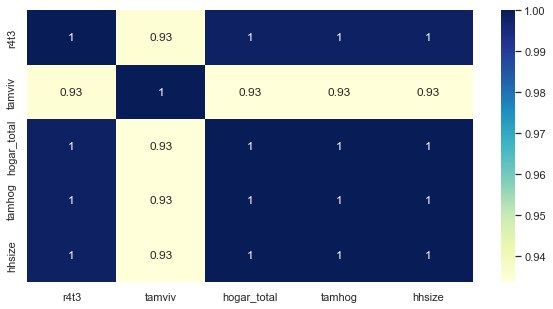

In [45]:
repeated_variables = ['r4t3', 'tamviv', 'hogar_total', 'tamhog', 'hhsize']
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(ros_df[repeated_variables].corr(), annot=True,cmap="YlGnBu")

**As per the definition of the variables above, we will keep 'tamviv' which shows the number of ppl in the household and 'tamhog' for the size of the household, the other variables will be dropped.**

In [46]:
ros_df.drop(columns=['r4t3', 'hogar_total','hhsize'], inplace=True)
ros_df.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,tamhog,tamviv,escolari,rez_esc,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,10,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,10,0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,12,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8.0,12,0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4
2,0.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,11,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8.0,0,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,9,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,1.0,11,0,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,11,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,1.0,11,0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,4


In [47]:
ros_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23984 entries, 0 to 23983
Columns: 129 entries, v2a1 to Target
dtypes: float64(6), int64(123)
memory usage: 23.6 MB


#### Remove null value rows of the target variable.

In [48]:
ros_df['Target'].isnull().sum()

0

In [49]:
##There are no null value ros in the target variable.

#### Selecting features and target 

In [50]:
X = ros_df.drop('Target',axis=1)
y = ros_df.Target

In [51]:
X.shape, y.shape

((23984, 128), (23984,))

#### Preprocessing

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = scaler.fit_transform(X)


#### Train, test, split

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#### Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression()

In [55]:
print('Model Score of train data : {}'.format(linreg.score(X_train,Y_train)))
print('Model Score of test data : {}'.format(linreg.score(X_test,Y_test)))

Model Score of train data : 0.3593530061773129
Model Score of test data : 0.3559323544201858


#### RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc_model=RandomForestClassifier(random_state=0)
parameters={'n_estimators':[10,50,100,300],'max_depth':[3,5,10,15]}
grid=zip([rfc_model],[parameters])

best_=None

for i, j in grid:
    a=GridSearchCV(i,param_grid=j,cv=3,n_jobs=1)
    a.fit(X_train,Y_train)
    if best_ is None:
        best_=a
    elif a.best_score_>best_.best_score_:
        best_=a
        
print ("Best CV Score",best_.best_score_)
print ("Model Parameters",best_.best_params_)
print("Best Estimator",best_.best_estimator_)

Best CV Score 0.9832699629997443
Model Parameters {'max_depth': 15, 'n_estimators': 300}
Best Estimator RandomForestClassifier(max_depth=15, n_estimators=300, random_state=0)


In [57]:
rfc_model=best_.best_estimator_
Model=rfc_model.fit(X_train,Y_train)
pred=Model.predict(X_test)

In [58]:
print('Model Score of train data : {}'.format(Model.score(X_train,Y_train)))
print('Model Score of test data : {}'.format(Model.score(X_test,Y_test)))

Model Score of train data : 0.9978110178766874
Model Score of test data : 0.9899937460913071


#### Checking if our model is working fine..

In [59]:
y_predict = rfc_model.predict(X_test)
y_predict

array([4, 2, 4, ..., 2, 3, 2], dtype=int64)

### Checking for accuracy

##### Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [61]:
confusion_matrix(Y_test,y_predict)

array([[1203,    0,    0,    0],
       [   3, 1152,    1,   10],
       [   0,    0, 1238,    1],
       [   7,    7,   19, 1156]], dtype=int64)

##### F1-Score

In [62]:
f1_score(Y_test,y_predict,average='weighted')

0.9899653002707695

##### Accuracy Score

In [63]:
accuracy_score(Y_test,y_predict)

0.9899937460913071

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(shuffle=True, n_splits=5)
cv_results = cross_val_score(rfc_model, X_train, Y_train, cv=kf, scoring='accuracy')

print('Cross_validation result:{} & Avg Cross_validation result:{}'.format(cv_results,cv_results.mean()))


Cross_validation result:[0.98619072 0.98983846 0.98592651 0.98670837 0.98853271] & Avg Cross_validation result:0.9874393521406377


### Moving on to the inspecting, pre-processing and testing our test data

In [65]:
test_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [66]:
test_df.loc[test_df['v2a1'].isnull(),'v2a1'] = 0
sum(test_df['v2a1'].isnull())

0

In [67]:
test_df.loc[test_df['v18q1'].isnull(),'v18q1'] = 0
test_df['v18q1'].isnull().sum()

0

In [68]:
test_df.loc[test_df['rez_esc'].isnull(),'rez_esc'] = 0
test_df['rez_esc'].isnull().sum()

0

In [69]:
# Mapping categorical values to int
test_df['edjefe'] = (test_df['edjefe'].replace(to_replace = ['yes','no'],value = ['1','0'])).astype('int64')
test_df['edjefa'] = (test_df['edjefa'].replace(to_replace = ['yes','no'],value = ['1','0'])).astype('int64')
test_df['dependency'] = (test_df['dependency'].replace(to_replace = ['yes','no'],value = ['1','0'])).astype('float')

In [70]:
test_df['meaneduc'].fillna(value = test_df.meaneduc.mean(), inplace=True)
test_df['meaneduc'].isna().sum()

0

In [71]:
test_df.drop(columns=['Id', 'idhogar'], inplace=True)

In [72]:
test_df.drop(columns=['SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned','agesq'], inplace=True)

In [73]:
test_df.drop(columns=['r4t3', 'hogar_total','hhsize'], inplace=True)

In [74]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 128 entries, v2a1 to age
dtypes: float64(6), int64(122)
memory usage: 23.3 MB


#### Predicting on the test data

In [75]:
test_df_final = pd.DataFrame(test_df.copy())
test_df = scaler.fit_transform(test_df)

In [76]:
test_prediction = rfc_model.predict(test_df)
test_prediction

array([4, 4, 4, ..., 2, 2, 2], dtype=int64)

In [77]:
df_predicted = pd.DataFrame(test_prediction, columns = ['Predicted_Proverty_Indicator'])
df_predicted

,Predicted_Proverty_Indicator
0,4
1,4
2,4
3,4
4,4
...,...
23851,3
23852,2
23853,2
23854,2


In [78]:
test_df_final.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,tamhog,tamviv,escolari,rez_esc,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age
0,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,0,0.5,0,17,16.500000,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4
1,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,16,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0.5,0,17,16.500000,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41
2,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,17,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0.5,0,17,16.500000,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41
3,0.0,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,16,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,16,0,16.000000,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59
4,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,11,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8.0,0,11,9.157474,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18


In [79]:
test_df_final.reset_index(drop=True, inplace=True)
df_predicted.reset_index(drop=True, inplace=True)
df_all = pd.concat([test_df_final, df_predicted], axis=1)
df_all.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,tamhog,tamviv,escolari,rez_esc,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Predicted_Proverty_Indicator
0,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,0,0.5,0,17,16.500000,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,4
1,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,16,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0.5,0,17,16.500000,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,4
2,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,17,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0.5,0,17,16.500000,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,4
3,0.0,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,16,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,16,0,16.000000,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,4
4,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,11,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8.0,0,11,9.157474,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,4
